# LinkedIn Job posting

In [1]:
#import library
import pandas as pd
import numpy as np

In [2]:
#load data from csv file
df=pd.read_csv("C:\Ragavi Job\Skillovilla\Projects\LinkedIn Job Analysis\postings.csv")
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,1.715450e+12,NaN,NaN,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,1.715488e+12,NaN,NaN,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,1.716044e+12,NaN,NaN,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY


In [ ]:
#Total count of table
df.shape

In [ ]:
#Null row count
df.isnull().sum()

In [3]:
#drop duplicates and duplicates
df.dropna(subset=['description'],inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123842 entries, 0 to 123848
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123842 non-null  int64  
 1   company_name                122124 non-null  object 
 2   title                       123842 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29792 non-null   float64
 5   pay_period                  36072 non-null   object 
 6   location                    123842 non-null  object 
 7   company_id                  122126 non-null  float64
 8   views                       122153 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29792 non-null   float64
 11  formatted_work_type         123842 non-null  object 
 12  applies                     23318 non-null   float64
 13  original_liste

In [ ]:
pip install beautifulsoup4

In [ ]:
#Get the description after removing special character
import re
from bs4 import BeautifulSoup

In [ ]:
df['Clean_Descr']=df['description'].str.replace('<.*?>', '').str.lower()
df['Clean_Descr']=df['Clean_Descr'].str.replace('[^a-z\s]','')
df['Clean_Descr']

In [ ]:
import nltk

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
stop_wrd=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()


In [ ]:
def preprocess(text):
    token=word_tokenize(text)
    token=[lemmatizer.lemmatize(word) for word in token if word not in stop_wrd]
    return ' '.join(token)

In [ ]:
df['processed_text']=df['Clean_Descr'].apply(preprocess)
df['processed_text']

In [ ]:
#get the most frequent words from descr
from collections import Counter
 
all_wrd=' '.join(df['processed_text']).split()
word_freq=Counter(all_wrd)
common_wrd=word_freq.most_common(20)
word,counts=zip(*common_wrd)
sns.barplot(x=list(counts),y=list(word))

In [7]:
#plot graph against each type
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
work_type_cnt=df['work_type'].value_counts()
work_type_cnt

FULL_TIME     98807
CONTRACT      12117
PART_TIME      9696
TEMPORARY      1190
INTERNSHIP      983
VOLUNTEER       562
OTHER           487
Name: work_type, dtype: int64

Text(0.5, 0, 'Work Type')

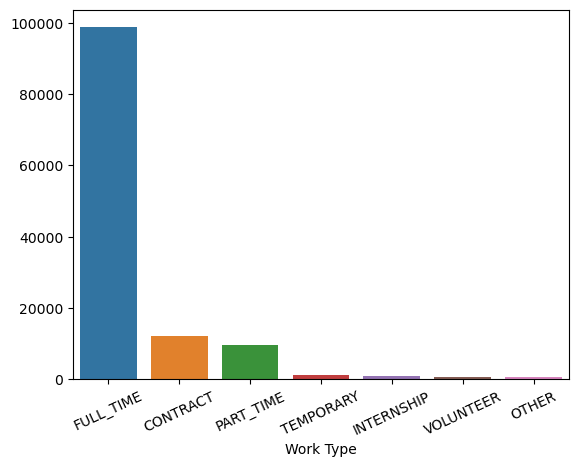

In [8]:
#From the plot it is found that max work is of full_time
sns.barplot(x=work_type_cnt.index,y=work_type_cnt.values)
plt.xticks(rotation=25)
plt.xlabel('Work Type')

In [ ]:
#Top 20 job profiles
Top_Title=df['title'].value_counts().head(20)


In [ ]:
#from the plot sales manager has high demand
sns.barplot(x=Top_Title.values,y=Top_Title.index)

In [11]:
#Title Description who is having high salary
df[df['title'].notnull()].sort_values(['max_salary'],ascending=False).head(10)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
94881,3904911743,EOX Vantage,Marketing Director,"Marketing Director: EOX Vantage, Cleveland, Oh...",120000000.0,YEARLY,"Cleveland, OH",126632.0,31.0,NaN,...,1.729001e+12,NaN,NaN,NaN,1.713449e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
4781,3884923962,"Platinum Legal Search Group, LLC",Partner (& Groups w/ Portable Business for Top...,We're recruiting for a Top Law Firm seeking Pa...,1500000.0,YEARLY,San Francisco Bay Area,12979710.0,8.0,NaN,...,1.714940e+12,NaN,NaN,NaN,1.712348e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
4908,3884928788,"Platinum Legal Search Group, LLC",Partner (& Groups w/ Portable Business for Top...,We're recruiting for a Top Law Firm seeking Pa...,1500000.0,YEARLY,"New York, NY",12979710.0,14.0,NaN,...,1.714941e+12,NaN,NaN,NaN,1.712349e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
4735,3884921825,"Platinum Legal Search Group, LLC",Partner (& Groups w/ Portable Business for Top...,We're recruiting for a Top Law Firm seeking Pa...,1500000.0,YEARLY,"Pennsylvania, United States",12979710.0,16.0,NaN,...,1.714940e+12,NaN,NaN,NaN,1.712348e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
91967,3904572369,"Platinum Legal Search Group, LLC","Corporate, Litigation, Intellectual Property ,...",We're recruiting for a Top Law Firm seeking Pa...,1500000.0,YEARLY,"Richmond, VA",12979710.0,2.0,NaN,...,1.716142e+12,NaN,NaN,NaN,1.713550e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
97908,3904964694,SSTech LLC,NEO4J- Senior Database administrator,"As a Neo4j database administrator, you are res...",1300000.0,YEARLY,United States,15454345.0,47.0,NaN,...,1.716048e+12,NaN,NaN,NaN,1.713456e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
44910,3900949687,Avance Consulting,Dotnet Developer,".Net Developer SanDiego, CA; Long Beach, CAFul...",1220000.0,YEARLY,"California, United States",613812.0,23.0,NaN,...,1.715981e+12,NaN,Mid-Senior level,NaN,1.713389e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
116367,3905868067,Goliath Partners,Quantitative Researcher,Goliath Partners is working with a global prop...,1200000.0,YEARLY,Greater Chicago Area,92699700.0,2.0,NaN,...,1.716129e+12,NaN,Mid-Senior level,NaN,1.713537e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
34903,3895518242,N2S Healthcare Staffing Solutions LLC,Technical Lab Specialist,Position Name: Technical Lab SpecialistLocatio...,1115000.0,YEARLY,"Charlotte, NC",65320905.0,1.0,NaN,...,1.715479e+12,NaN,Mid-Senior level,NaN,1.712887e+12,NaN,0,CONTRACT,USD,BASE_SALARY
91450,3904508589,Robert Half,Property Controller,Robert Half is reviewing candidates for an amb...,1100000.0,YEARLY,"Philadelphia, PA",1681.0,1.0,NaN,...,1.716131e+12,NaN,Mid-Senior level,NaN,1.713539e+12,NaN,0,FULL_TIME,USD,BASE_SALARY


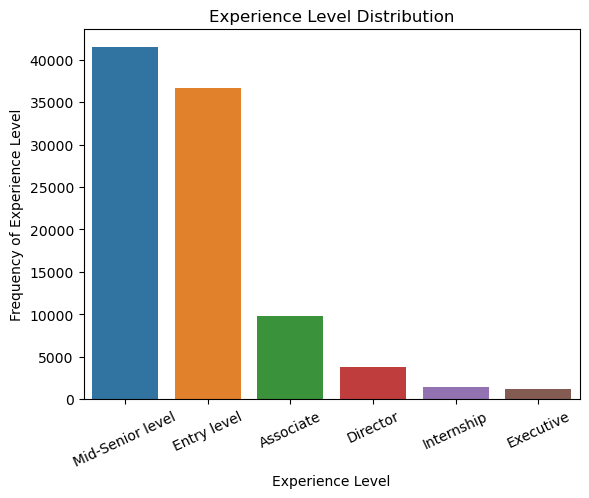

In [15]:
sns.barplot(x=df['formatted_experience_level'].value_counts().index,y=df['formatted_experience_level'].value_counts())
plt.xlabel('Experience Level')
plt.ylabel('Frequency of Experience Level')
plt.title('Experience Level Distribution')
plt.xticks(rotation=25)
plt.show()

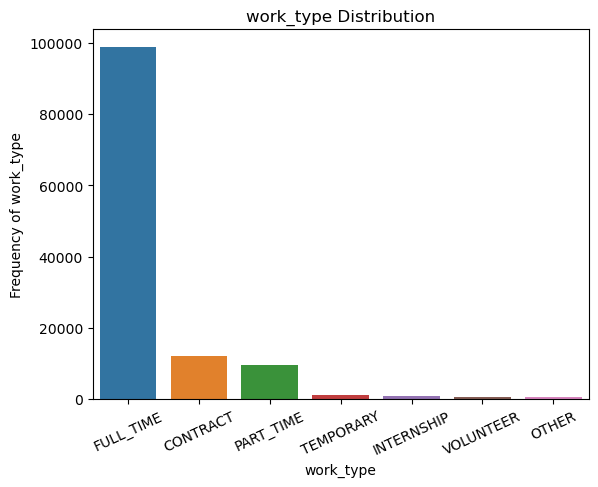

In [17]:
sns.barplot(x=df['work_type'].value_counts().index,y=df['work_type'].value_counts())
plt.xlabel('work_type')
plt.ylabel('Frequency of work_type')
plt.title('work_type Distribution')
plt.xticks(rotation=25)
plt.show()

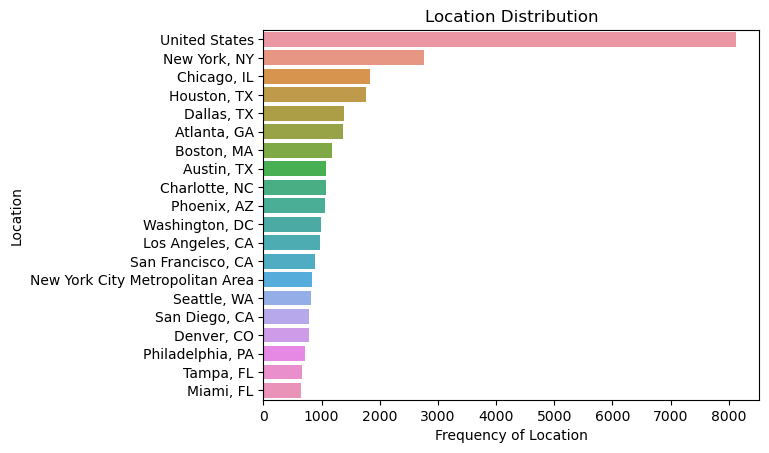

In [27]:
sns.barplot(y=df['location'].value_counts(dropna=False).head(20).index,x=df['location'].value_counts(dropna=False).head(20).values)

plt.ylabel('Location')
plt.xlabel('Frequency of Location')
plt.title('Location Distribution')
plt.show()

In [37]:
remote_count=df['remote_allowed'].value_counts(dropna=False)
remote_count.index=df['remote_allowed'].value_counts(dropna=False).index.map({1.0:'Remote allowed',float('NaN'):'Remote not allowed'})

Text(0.5, 1.0, 'Remote_allowed Distribution')

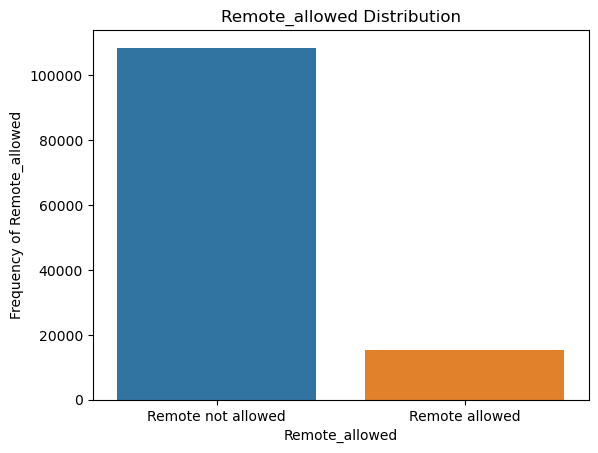

In [40]:
#Most of job prefer work from office
sns.barplot(x=remote_count.index,y=remote_count.values)
plt.xlabel('Remote_allowed')
plt.ylabel('Frequency of Remote_allowed')
plt.title('Remote_allowed Distribution')